### Optimizing Raisin Classification with Machine Learning Hyperparameter Tuning


#### Introduction

In this project, we analyze the Raisin Dataset to classify raisin types using machine learning models. We perform hyperparameter tuning for a Decision Tree and Logistic Regression model to optimize performance. 

**Workflow:**
1. Load and explore the dataset (EDA).
2. Preprocess the data: split into training and testing sets.
3. Train and optimize models with GridSearchCV and RandomizedSearchCV.
4. Evaluate the models and analyze hyperparameter effects.
5. Draw conclusions based on the findings.

##### Libraries and Setup

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

##### Load and Explore the Dataset and explore the first rows

In [29]:
raisins = pd.read_excel('Raisin_Dataset.xlsx')
raisins.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


##### Summary statistics and Dataset basic Info for numerical columns

In [31]:
raisins.info()
raisins.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


##### Class distribution visualizatios


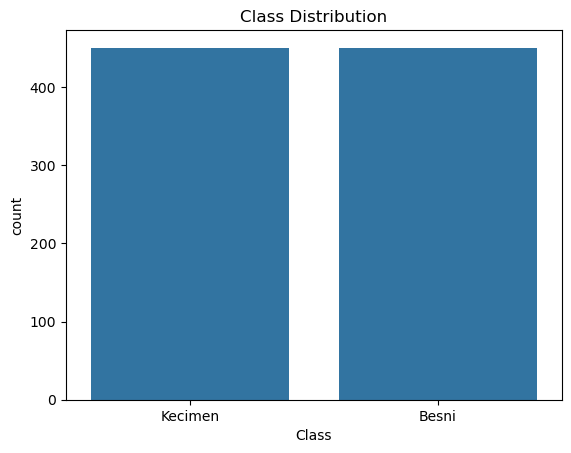

In [33]:
sns.countplot(data=raisins, x="Class")
plt.title("Class Distribution")
plt.show()

##### Explore and  Visualize relationships between features


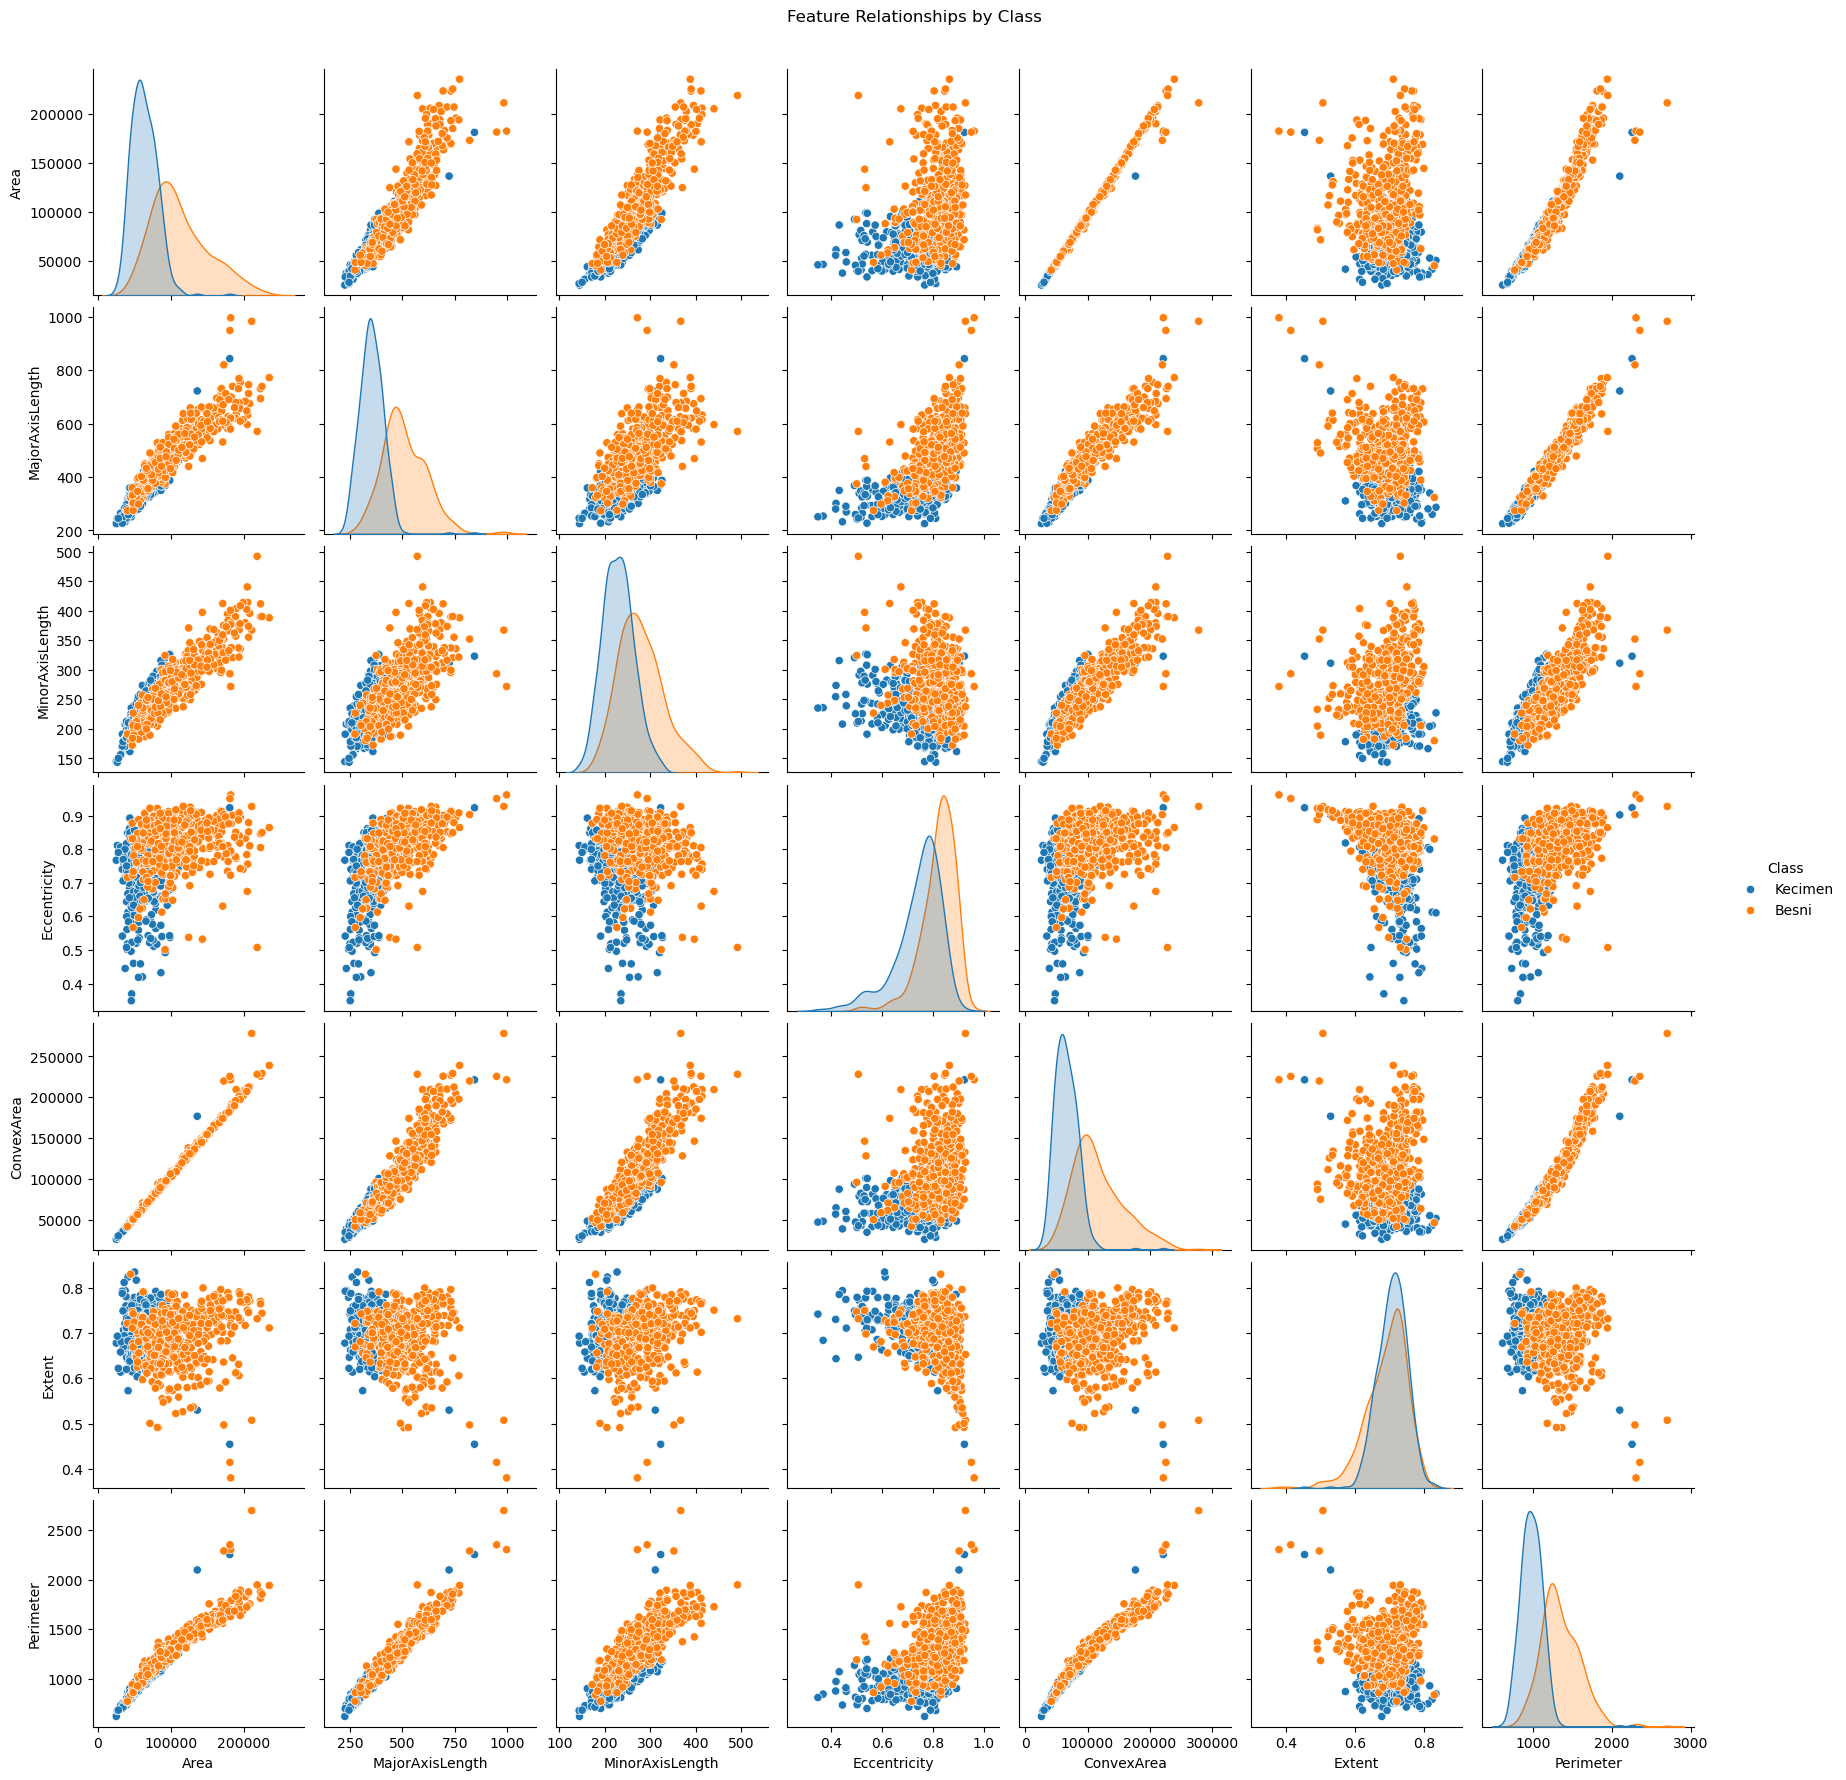

In [30]:
sns.pairplot(raisins, hue="Class")
plt.suptitle("Feature Relationships by Class", y=1.02)
plt.show()

#### Preprocessing Data for our Models

##### Create predictor and target variables, X and y


In [24]:
X = raisins.drop(columns=['Class']) # the rest of the columns together compose the predictor variable matrix
y = raisins['Class'] #The column 'Class' represents the target variable

##### Examine the dataset. We want to check total number of features, total number of samples and different values for the Class column

In [38]:
print("NUmber of rows and columns:", X.shape) # rows x columns
print("Uniue values for y target variable:", y.unique())
print(type(y))


NUmber of rows and columns: (900, 7)
Uniue values for y target variable: ['Kecimen' 'Besni']
<class 'pandas.core.series.Series'>


##### Split into training and testing sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

#### Grid Search with Decision Tree Classifier

##### We create a Decision Tree model


In [5]:
tree = DecisionTreeClassifier()

##### Hyperparameters definition for GridSearchCV

In [40]:
parameters = {'min_samples_split': [2,3,4], 'max_depth': [3,5,7]}

##### Create a GridSearchCV model and then we can fit the GridSearchCV model to the training data

In [41]:
grid = GridSearchCV(tree, parameters)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 3, 4]})

##### Down, we will:

- Print the model and hyperparameters obtained by GridSearchCV
- Print best score, it gives the best score
- Print the accuracy of the final model on the test data with: gives the best score on test data.



In [8]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.score(X_test, y_test))

DecisionTreeClassifier(max_depth=5, min_samples_split=3)
0.8711111111111112
0.8177777777777778


##### As summary, we can print a table summarizing the results of GridSearchCV

In [43]:
print(grid.cv_results_, "\n")
print(grid.cv_results_['params'])

hyperparameter_values = pd.DataFrame(grid.cv_results_['params'])
randomsearch_scores = pd.DataFrame(grid.cv_results_['mean_test_score'], columns = ['score'])
df = pd.concat([hyperparameter_values, randomsearch_scores], axis = 1)
print(df)

{'mean_fit_time': array([0.00419049, 0.00373449, 0.00345783, 0.00339613, 0.00360837,
       0.0030591 , 0.00360427, 0.00373893, 0.00396233]), 'std_fit_time': array([8.13935488e-04, 6.48947178e-04, 3.98416305e-04, 4.87598873e-04,
       4.79778767e-04, 3.26027810e-04, 4.93808256e-04, 3.79447986e-04,
       8.40434656e-05]), 'mean_score_time': array([0.00159783, 0.0013998 , 0.00180063, 0.00160847, 0.00100069,
       0.00160308, 0.00152192, 0.00153785, 0.00139546]), 'std_score_time': array([4.88492089e-04, 4.89454062e-04, 4.00132769e-04, 4.87464743e-04,
       2.58285571e-06, 4.85747612e-04, 5.88447301e-04, 4.53125945e-04,
       4.84714646e-04]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=999999), 'param_min_samples_split': masked_array(data=[2, 3, 4, 2, 3, 4, 2, 3, 4],
             mask=[False, False, False, False, False, False, False, False,
   

#### Random Search with Logistic Regression

##### Prepare The logistic regression model

In [10]:
lr = LogisticRegression(solver='liblinear', max_iter = 1000)

##### Define distributions to choose hyperparameters from

In [11]:
from scipy.stats import uniform

distributions = {'penalty': ['l1', 'l2'], 'C': uniform(loc=0, scale=100)}

##### Create a RandomizedSearchCV model and fit it with trainin data

In [12]:
clf = RandomizedSearchCV(lr, distributions, n_iter=8)
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'),
                   n_iter=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A70762F0B0>,
                                        'penalty': ['l1', 'l2']})

##### We print:

- the best esimator
- the best score
- a table summarizing the results of RandomSearchCV

In [13]:
print(clf.best_estimator_)
print(clf.best_score_)

df = pd.concat([pd.DataFrame(clf.cv_results_['params']), pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['Accuracy'])] ,axis=1)
print(df.sort_values('Accuracy', ascending = False))


LogisticRegression(C=31.678333789301405, max_iter=1000, penalty='l1',
                   solver='liblinear')
0.8755555555555556
           C penalty  Accuracy
0  31.678334      l1  0.875556
1  34.591532      l1  0.875556
3  45.927832      l1  0.875556
6  47.629568      l1  0.875556
4  55.294595      l2  0.875556
2  73.604335      l1  0.874074
5  75.536321      l1  0.874074
7  52.341613      l1  0.874074


### Conclusion

**Key Findings:**
- The Decision Tree classifier performed well after hyperparameter tuning, achieving a test accuracy of 0.82.
- Logistic Regression with random search optimization also provided competitive results with a test accuracy of 0,87.
- Hyperparameter tuning demonstrated the importance of optimizing model parameters for improved performance.